In [5]:
import pandas as pd

# read the CSV file
dataframe = pd.read_csv('https://raw.githubusercontent.com/DDOS-Attacks-detection-in-IOT-using-ML/DDOS-Detection/main/DDoSdata.csv')
cols=['saddr','daddr','pkts','attack','bytes']
dataframe[cols]

,saddr,daddr,pkts,attack,bytes
0,192.168.100.150,192.168.100.3,10,0,1729
1,192.168.100.150,192.168.100.3,8,0,1708
2,192.168.100.149,192.168.100.3,10,0,1488
3,192.168.100.149,192.168.100.3,15,0,3720
4,192.168.100.149,192.168.100.3,11,0,1882
...,...,...,...,...,...
91,192.168.100.150,192.168.100.3,14,1,1404
92,192.168.100.3,192.168.100.147,21,1,1470
93,192.168.100.3,192.168.100.148,21,0,1470
94,192.168.100.3,192.168.100.150,21,0,1470


In [6]:
filtered_df = dataframe[dataframe['pkts'] >= 6]
# group the filtered dataframe by saddr and apply the difference calculation
result = filtered_df.groupby('saddr')['pkts'].apply(lambda x: x.diff().dropna())
print(result)

saddr              
192.168.100.147  6     -2.0
                 8     -1.0
                 18    -1.0
                 19    -1.0
                 25     7.0
                       ... 
192.168.100.3    89     2.0
                 92    12.0
                 93     0.0
                 94     0.0
                 95     0.0
Name: pkts, Length: 65, dtype: float64


In [7]:
# get only unique source addresses
import pandas as pd
unique_values = dataframe['saddr'].unique()
print(unique_values)
desired_rows = []
my_dict = {}
for i in unique_values:
    desired_rows = dataframe[dataframe['saddr'] == i]
    my_dict[i] = desired_rows['pkts'].values.__array__()

['192.168.100.150' '192.168.100.149' '192.168.100.147' '192.168.100.148'
 '192.168.100.3']


In [8]:
# DDOS attack detect on specific source IP address if there are more number of packets send to the destination address
ips = []
packets = []
for key,value in my_dict.items(): # get a list of dictionary items
    for i in range(len(value) -1):  # iterate over the list of items
        diff = value[i+1] - value[i]
        if diff >= 6:
            print('DDOS attack on IP Address: ', key, "with a packet difference of ", diff)
            ips.append(key)
            packets.append(diff)
print("IPs", ips)
print("packets: " , packets)

DDOS attack on IP Address:  192.168.100.150 with a packet difference of  11
DDOS attack on IP Address:  192.168.100.150 with a packet difference of  7
DDOS attack on IP Address:  192.168.100.150 with a packet difference of  6
DDOS attack on IP Address:  192.168.100.147 with a packet difference of  7
DDOS attack on IP Address:  192.168.100.147 with a packet difference of  13
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  8
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  9
DDOS attack on IP Address:  192.168.100.148 with a packet difference of  9
DDOS attack on IP Address:  192.168.100.3 with a packet difference of  16
IPs ['192.168.100.150', '192.168.100.150', '192.168.100.150', '192.168.100.147', '192.168.100.147', '192.168.100.148', '192.168.100.148', '192.168.100.148', '192.168.100.3']
packets:  [11, 7, 6, 7, 13, 8, 9, 9, 16]


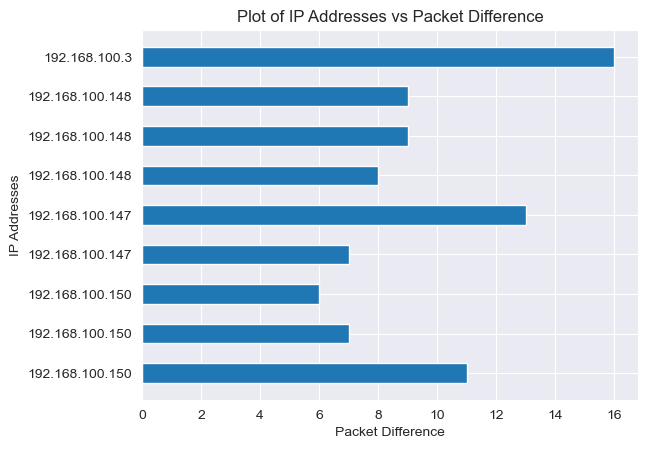

In [9]:
#
import matplotlib.pyplot as plt
import numpy as np

plt.barh(np.arange(len(ips)), packets, height=0.5, align='center')
plt.yticks(np.arange(len(ips)), ips)

plt.xlabel('Packet Difference')
plt.ylabel('IP Addresses')
plt.title('Plot of IP Addresses vs Packet Difference')
plt.show()


In [15]:
# print rows where category = 'DDOS'
df_attacked = dataframe[ (dataframe['category'] =='DDoS') ]
df_attacked

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,Unnamed: 46,subcategory
10,1650465,1650465,1528102929,e *,4,tcp,1,192.168.100.150,54460,192.168.100.3,...,0.25679,0.32499,100,47,0.35592,0.32499,1003,459,NaN,HTTP
12,1650467,1650467,1528102929,e,1,tcp,1,192.168.100.148,55470,192.168.100.3,...,0.21154,0.32499,100,18,0.18191,0.32499,1003,194,NaN,HTTP
13,1650468,1650468,1528102929,e *,4,tcp,1,192.168.100.148,55476,192.168.100.3,...,0.21154,0.32499,100,18,0.34563,0.32499,1003,194,NaN,HTTP
24,1650773,1650773,1528102935,e s,2,tcp,1,192.168.100.148,55554,192.168.100.3,...,0.40931,0.49310,100,1,0.40931,0.49310,1075,20,NaN,HTTP
25,1650774,1650774,1528102943,e s,2,tcp,1,192.168.100.147,57470,192.168.100.3,...,0.41339,0.49310,100,46,0.75578,0.49310,1075,480,NaN,HTTP
26,1650776,1650776,1528102937,e s,2,tcp,1,192.168.100.150,54468,192.168.100.3,...,0.34595,0.49310,100,8,0.39934,0.49310,1075,122,NaN,HTTP
76,1915621,1915621,1528095745,e s,2,tcp,1,192.168.100.147,13242,192.168.100.3,...,0.64396,0.64396,100,100,0.81402,0.64396,1102,1102,NaN,TCP
80,1920025,1920025,1528095745,e g,5,tcp,1,192.168.100.150,18690,192.168.100.3,...,0.47117,0.47118,100,76,0.47658,0.47118,718,526,NaN,TCP
91,2457250,2457249,1528095779,e s,2,tcp,1,192.168.100.150,13242,192.168.100.3,...,0.25638,0.24036,100,76,0.30508,0.24036,646,544,NaN,TCP
92,2628651,2628650,1528099322,e,1,icmp,4,192.168.100.3,0x0303,192.168.100.147,...,1.40005,1.40005,1,1,1.40005,1.40005,21,21,NaN,UDP


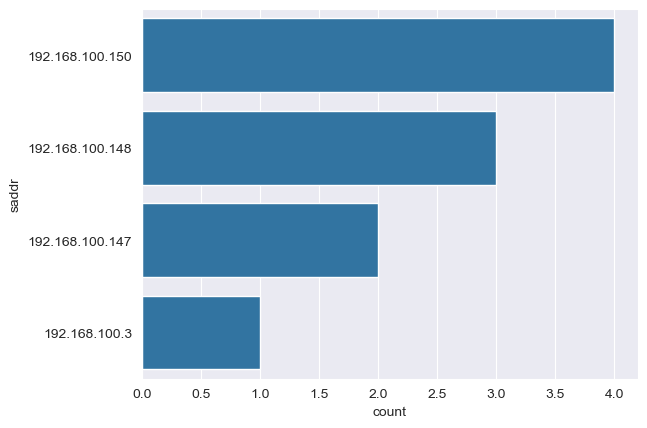

In [17]:
import seaborn as sb
def gen_bar(column,num_observ,df_type):
    base_color = sb.color_palette()[0]
    bot_order = df_type[column].value_counts()[:num_observ].index
    sb.countplot(data = df_type, y = column, color = base_color, order = bot_order)
gen_bar('saddr',4, dataframe[ (dataframe['attack'] == 1) ])

In [12]:
dataframe.daddr.value_counts().iloc[:4]

192.168.100.3      69
192.168.100.150     9
192.168.100.147     7
192.168.100.149     6
Name: daddr, dtype: int64

In [13]:
# getting a statistics of malicious packet count in each transaction
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_attacked.pkts.describe()

count   10.00000
mean    15.70000
std      4.57165
min      7.00000
25%     14.00000
50%     16.50000
75%     19.00000
max     21.00000
Name: pkts, dtype: float64

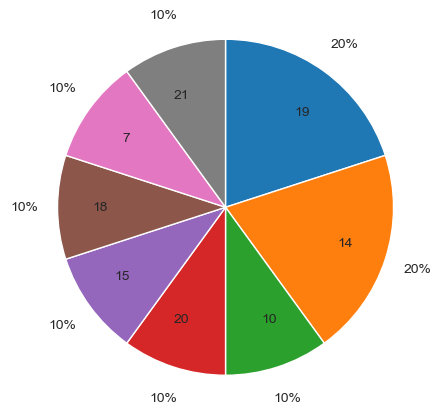

In [14]:
# generating a pie chart for attack dataset about the packets per transition number.
def gen_pie(column,num_observ,df_type):
    sorted_counts = df_type[column].value_counts()[:num_observ]
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.7,counterclock = False)
    plt.axis('square')
gen_pie('pkts',8,df_attacked)